# 1. Import Libraries and Dataframes

In [1]:
# Import analysis libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data'

In [25]:
# Import dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers.pkl'))

In [6]:
pd.options.display.max_columns = None

In [9]:
# Check output

df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,Loyalty_flag,average_spend_user,Spending_flag,median_order_freq_user,Order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# 2. Visualisations

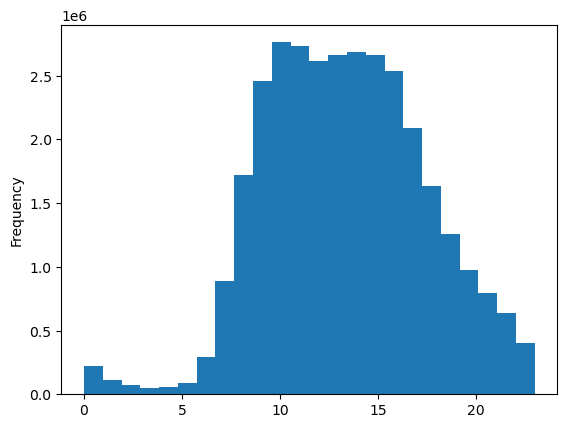

In [10]:
# Create a histogram of the “order_hour_of_day” column. 

hist1 = df['order_hour_of_day'].plot.hist(bins = 24)

The above histogram demonstrates the frequency of orders placed across the different hours of the day. Most orders are placed between 10 AM and 5 PM.

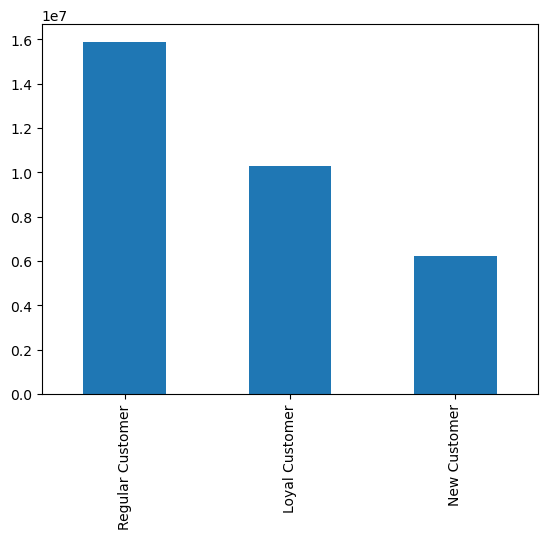

In [12]:
# Create a bar chart from the “loyalty_flag” column.

bar1 = df['Loyalty_flag'].value_counts().plot.bar()

The above bar chart shows the distribution of orders among customers in terms of loyalty.

In [13]:
# Check expenditure in relation to the hour of the day. 
# Step 1 - start to create a sample for the line chart.

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
# Split dataframe in two samples

big = df[dev]
small = df[~dev]

In [16]:
len(df)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
# Reduce my small sample to only those columns necessary for the line chart

df_2 = small[['order_hour_of_day', 'prices']]

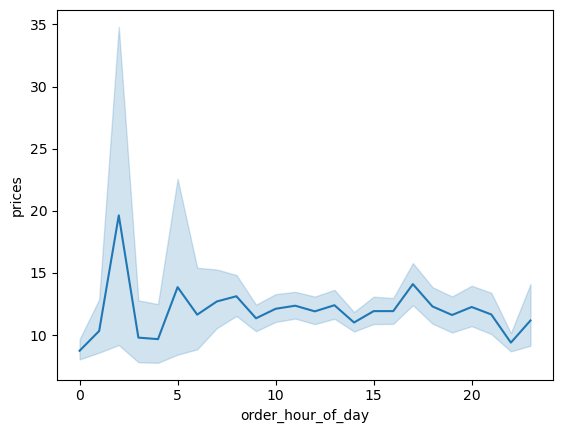

In [19]:
# Create the line chart

line1 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

There is a spike at 2 AM indicating that expenditure is at its highest at that time.

In [26]:
# Create a line chart exploring the connections between age and number of dependents
# Reduce my small dataframe to the necessary columns

df_3 = small[['n_dependants', 'age']]

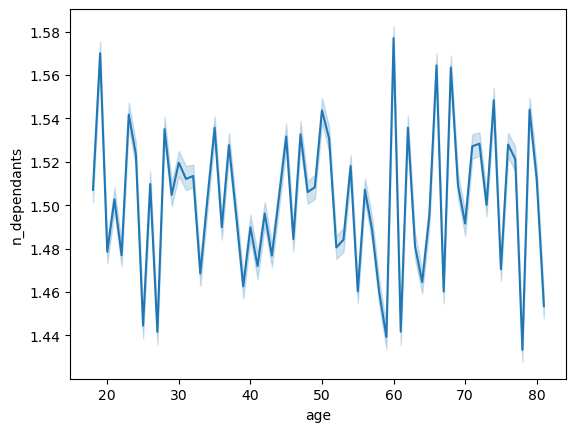

In [27]:
line2 = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

The above line chart shows the relationship between the age of customers and the number of dependents they may care for. Unfortunately, no meaningful results were yielded and further analysis may be needed.

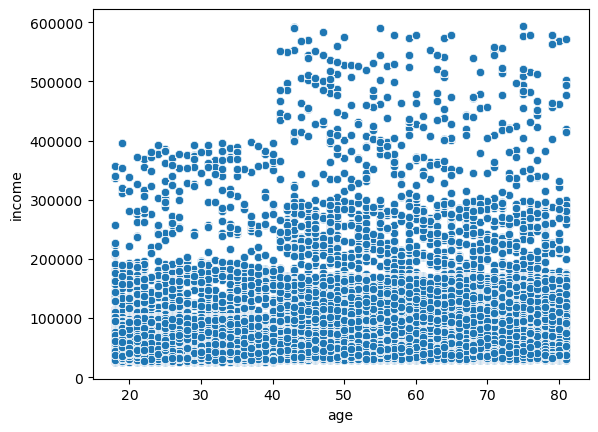

In [30]:
# Explore whether there’s a connection between age and spending power (income).

scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

The above scatterplot explores the relationship between age and income. There are no clear relations that can be identified in the scatterplot.

# 3. Exporting

In [31]:
# Set up a second path

path2 = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualisations'

In [32]:
hist1.figure.savefig(os.path.join(path2, 'histogram_order_of_day.png'))

In [33]:
bar1.figure.savefig(os.path.join(path2, 'loyalty_flag_bar_chart'))

In [34]:
line1.figure.savefig(os.path.join(path2, 'expenditure_order_time_of_day.png'))

In [35]:
line2.figure.savefig(os.path.join(path2, 'line_chart_age_dependants.png'))

In [37]:
scatterplot.figure.savefig(os.path.join(path2, 'scatterplot_age_income.png'))